In [1]:
# ✅ Install libraries if needed (for Google Colab only)
# !pip install pandas scikit-learn plotly

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [11]:
# -----------------------------
# ✅ Load Dataset
# -----------------------------
df = pd.read_csv("/content/NIFTY50_all.csv")   # <-- replace with your CSV file

print("\n📊 Preview of the Dataset:")
print(df)
print("\n🔎 Columns Available:", df.columns.tolist())


📊 Preview of the Dataset:
              Date      Symbol Series  Prev Close    Open     High    Low  \
0       2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0   
1       2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0   
2       2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0   
3       2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0   
4       2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0   
...            ...         ...    ...         ...     ...      ...    ...   
154414  2008-07-03        NTPC     EQ      158.90  159.90   160.00  150.0   
154415  2008-07-04        NTPC     EQ      152.55  152.55   155.90  151.0   
154416  2008-07-07        NTPC     EQ      153.90  157.00   158.40  153.5   
154417  2008-07-08        NTPC     EQ      155.60  156.90   163.90  151.5   
154418  2008-07-09        NTPC     EQ      161.30  164.90   170.50  163.0   

         Last   Close    VWAP    Volume      Tur

In [3]:
# -----------------------------
# ✅ Auto-detect text + target columns
# -----------------------------
text_cols = df.select_dtypes(include="object").columns.tolist()

if len(text_cols) == 0:
    raise Exception("❌ No text column found. Ensure dataset contains text.")

print("\n📌 Text-like columns detected:", text_cols)

text_column = text_cols[0]  # pick first text column automatically
print(f"✅ Selected text column → {text_column}")

# Target column must be categorical or few unique values
target_candidates = [col for col in df.columns if col != text_column and df[col].nunique() <= 20]

if len(target_candidates) == 0:
    raise Exception("❌ No suitable categorical label found. Please preprocess dataset.")

target_column = target_candidates[0]
print(f"✅ Selected target column → {target_column}")


📌 Text-like columns detected: ['Date', 'Symbol', 'Series']
✅ Selected text column → Date
✅ Selected target column → Series


### Simple Linear Regression

This example demonstrates how to perform a simple linear regression using `Volume` to predict `Close` price. We'll split the data into training and testing sets, train a `LinearRegression` model, and then evaluate its performance.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target
X = df[['Volume']]
y = df['Close']

print(f"Independent variable (X) shape: {X.shape}")
print(f"Dependent variable (y) shape: {y.shape}")

Independent variable (X) shape: (154419, 1)
Dependent variable (y) shape: (154419,)


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (123535, 1)
X_test shape: (30884, 1)
y_train shape: (123535,)
y_test shape: (30884,)


In [6]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(f"Model Intercept: {model.intercept_}")
print(f"Model Coefficient (Volume): {model.coef_[0]}")

Model Intercept: 1505.6478573297586
Model Coefficient (Volume): -6.239275671183547e-05


Mean Squared Error: 7079088.10
R-squared: 0.01


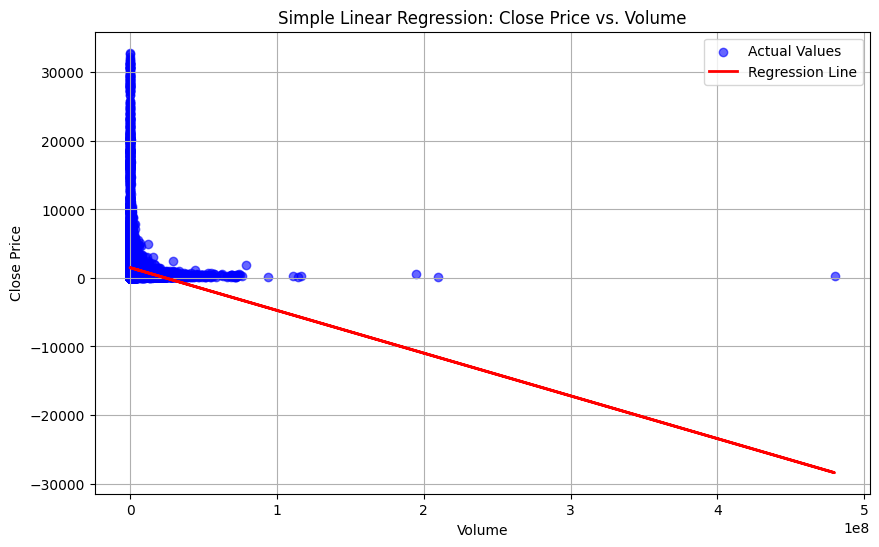

In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Simple Linear Regression: Close Price vs. Volume')
plt.legend()
plt.grid(True)
plt.show()

Further Analysis: Residuals and Predictions

1. Residual Analysis
Residuals (the differences between actual and predicted values) are crucial for checking the assumptions of linear regression. A good model should have residuals that are randomly scattered around zero, with no clear pattern. This suggests that the linear model is appropriate.

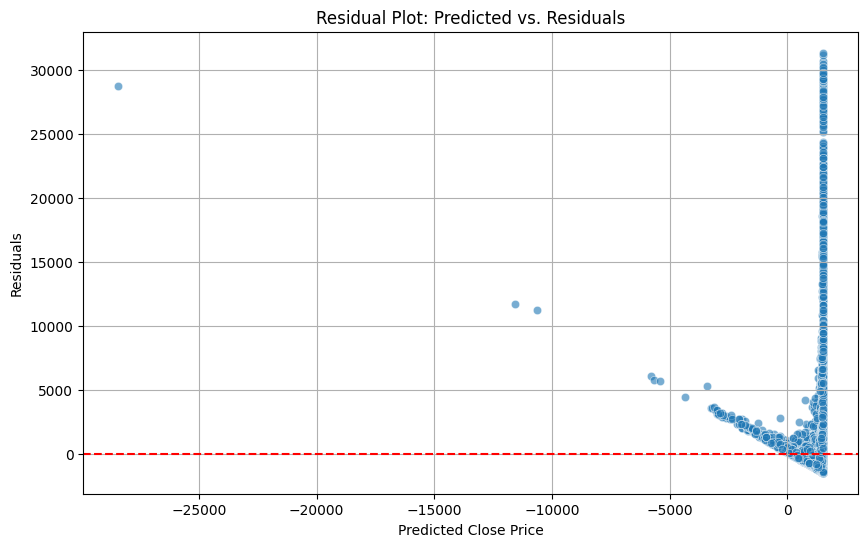

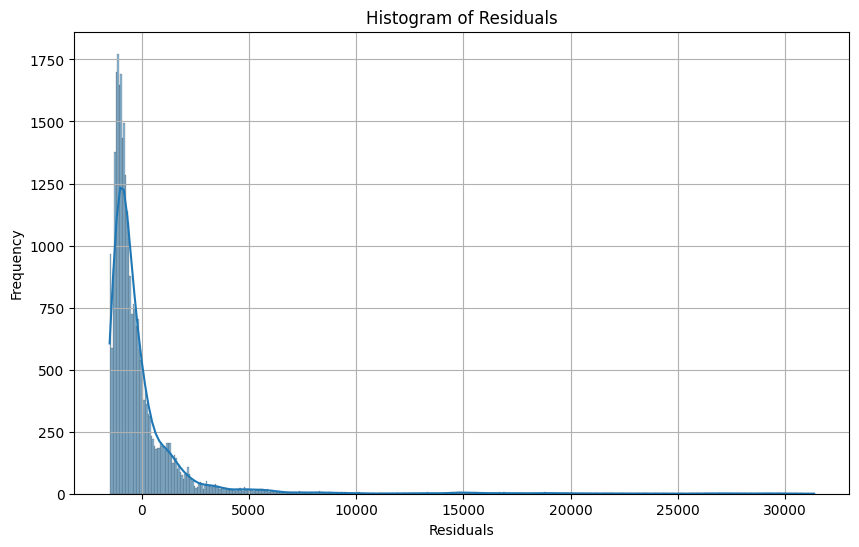

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted vs. Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

2. Interpreting the Model Coefficients
Let's re-examine the intercept and coefficient values we found:

Intercept: This is the predicted Close price when Volume is zero. In some contexts, an intercept might not make practical sense if the independent variable cannot be zero (e.g., zero volume). Here, model.intercept_ is approximately 1505.65.
Coefficient (Volume): This tells us how much the Close price is expected to change for every one-unit increase in Volume. Our coefficient (model.coef_[0]) is approximately -6.24e-05. This means that for every unit increase in Volume, the Close price is expected to decrease by approximately 0.0000624 units. This is a very small negative relationship.

3. Making Predictions for New Data
Now, let's use our trained model to predict the Close price for a new Volume value. For instance, what if the Volume is 10,000,000?

In [9]:
# Predict for a new Volume value (e.g., 10,000,000)
new_volume = 10000000
predicted_close_price = model.predict(np.array([[new_volume]]))

print(f"Predicted Close Price for a Volume of {new_volume}: {predicted_close_price[0]:.2f}")

Predicted Close Price for a Volume of 10000000: 881.72


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Correlation Heatmap

A heatmap is a great way to visualize the correlation matrix of numerical features in the dataset. It helps identify relationships between variables, where values closer to 1 or -1 indicate strong positive or negative correlations, respectively, and values closer to 0 indicate weak or no linear correlation.

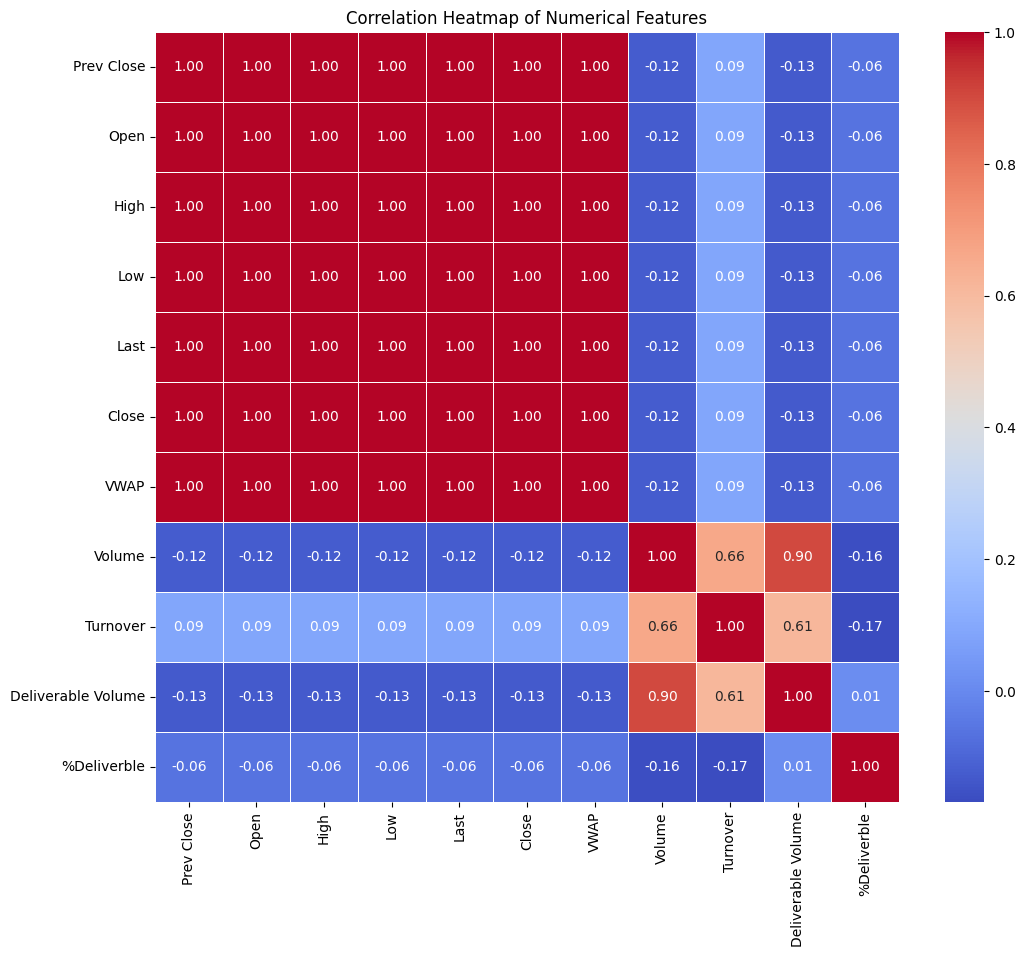

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
# Exclude 'Date' and 'Symbol' as they are not numerical for correlation
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Drop columns that are entirely NaN or have very few non-null values if they cause issues
# For simplicity, we'll exclude 'Trades' as it had NaNs in the preview
if 'Trades' in numerical_cols:
    numerical_cols.remove('Trades')

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### More Essential Financial Visualizations

#### 1. Daily Returns Distribution

Analyzing daily returns is crucial for understanding the volatility and potential risk/reward of an asset. We'll calculate the percentage change in the `Close` price and visualize its distribution using a histogram and KDE plot.

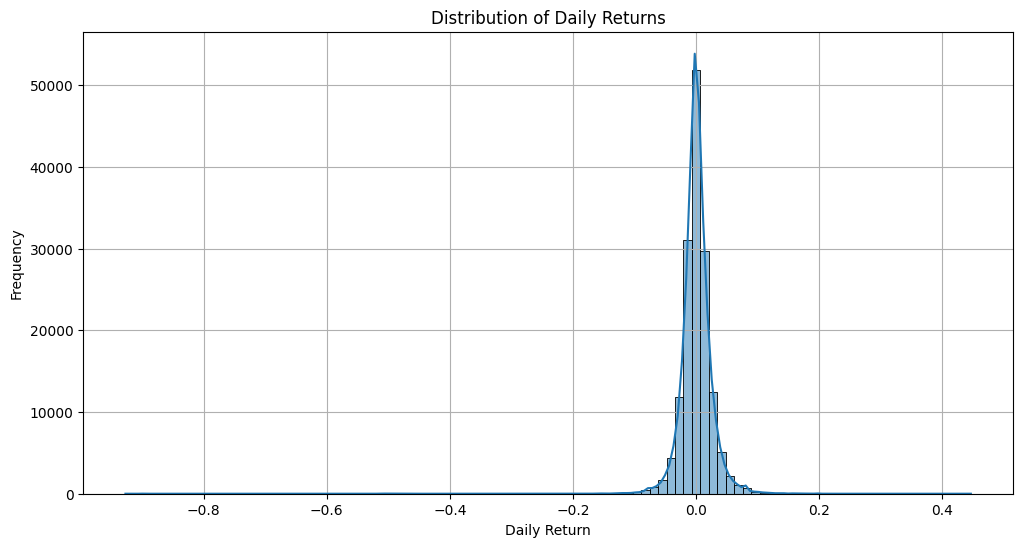

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily returns (percentage change in Close price)
df['Daily_Return'] = df.groupby('Symbol')['Close'].pct_change()

plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 2. Moving Averages Trend for a Specific Stock

Moving averages smooth out price data to identify trends. A shorter moving average (e.g., 20-day SMA) reacts more quickly to price changes, while a longer one (e.g., 50-day SMA) shows a more stable, longer-term trend. We'll plot these alongside the `Close` price for 'MUNDRAPORT'.

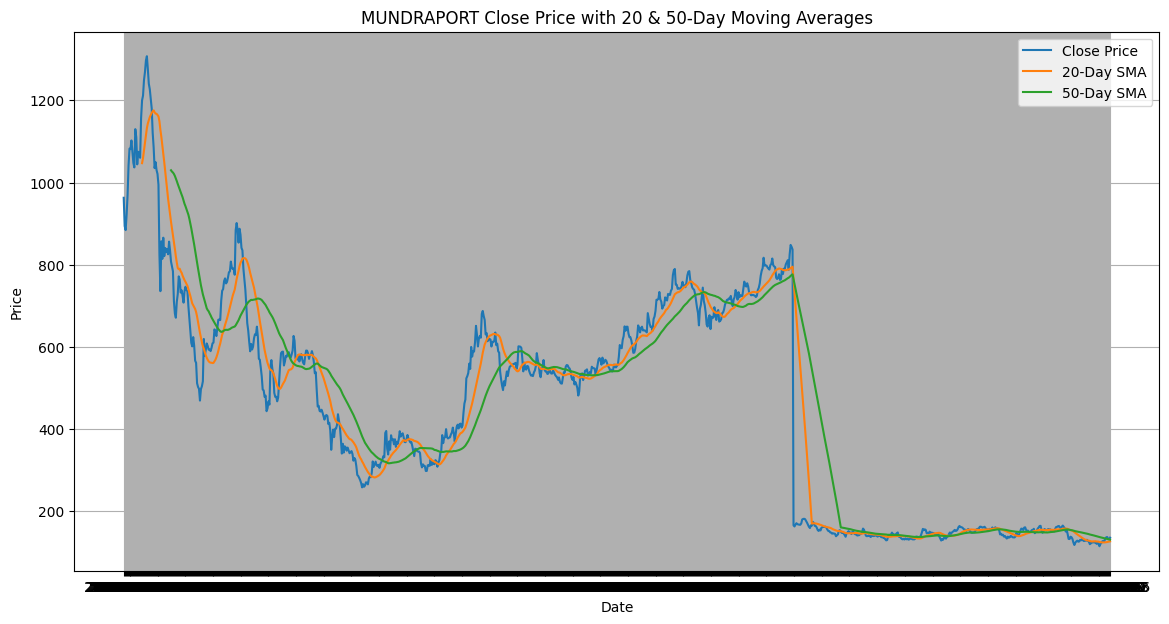

In [13]:
# Select data for 'MUNDRAPORT' and sort by Date
mundradf = df[df['Symbol'] == 'MUNDRAPORT'].sort_values('Date').copy()

# Calculate 20-day and 50-day Simple Moving Averages (SMA)
mundradf['SMA_20'] = mundradf['Close'].rolling(window=20).mean()
mundradf['SMA_50'] = mundradf['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=mundradf, label='Close Price')
sns.lineplot(x='Date', y='SMA_20', data=mundradf, label='20-Day SMA')
sns.lineplot(x='Date', y='SMA_50', data=mundradf, label='50-Day SMA')

plt.title('MUNDRAPORT Close Price with 20 & 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Volume Trend for a Specific Stock

Volume trends can confirm price trends or signal reversals. High volume during a price increase suggests strong conviction, while high volume during a price decrease indicates strong selling pressure.

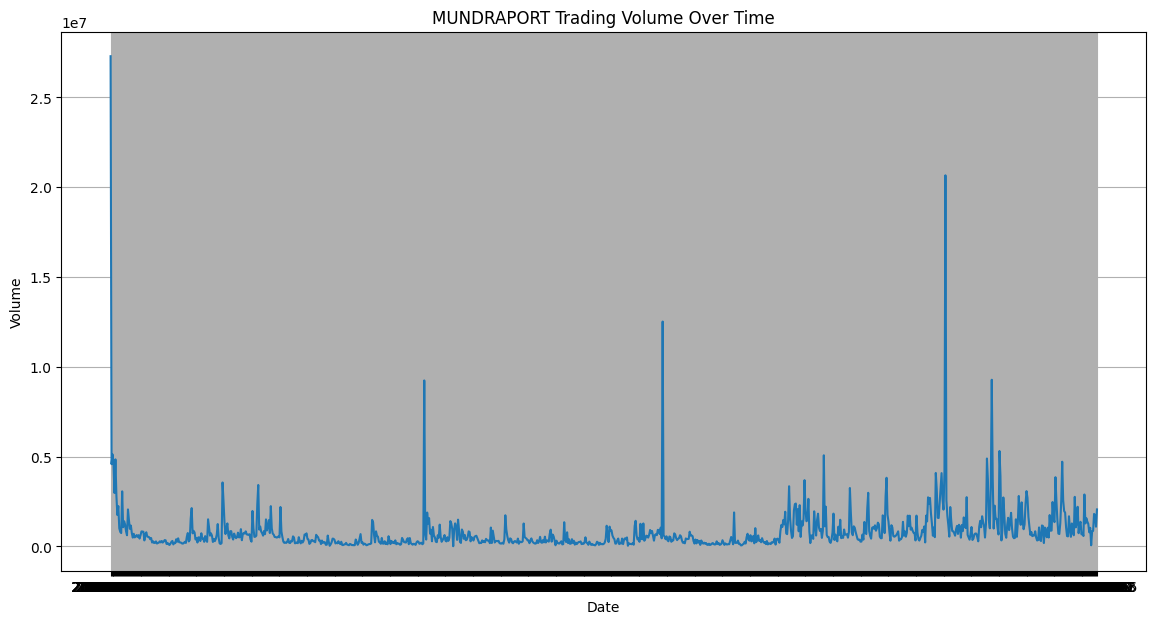

In [14]:
# Using the already filtered and sorted mundradf
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Volume', data=mundradf)
plt.title('MUNDRAPORT Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

### Additional Data Visualizations

#### 1. Time Series Plot of Close Price for a Specific Stock

Let's visualize the `Close` price trend for a particular stock over time. We'll pick 'MUNDRAPORT' as an example and ensure the 'Date' column is in datetime format first for proper plotting.

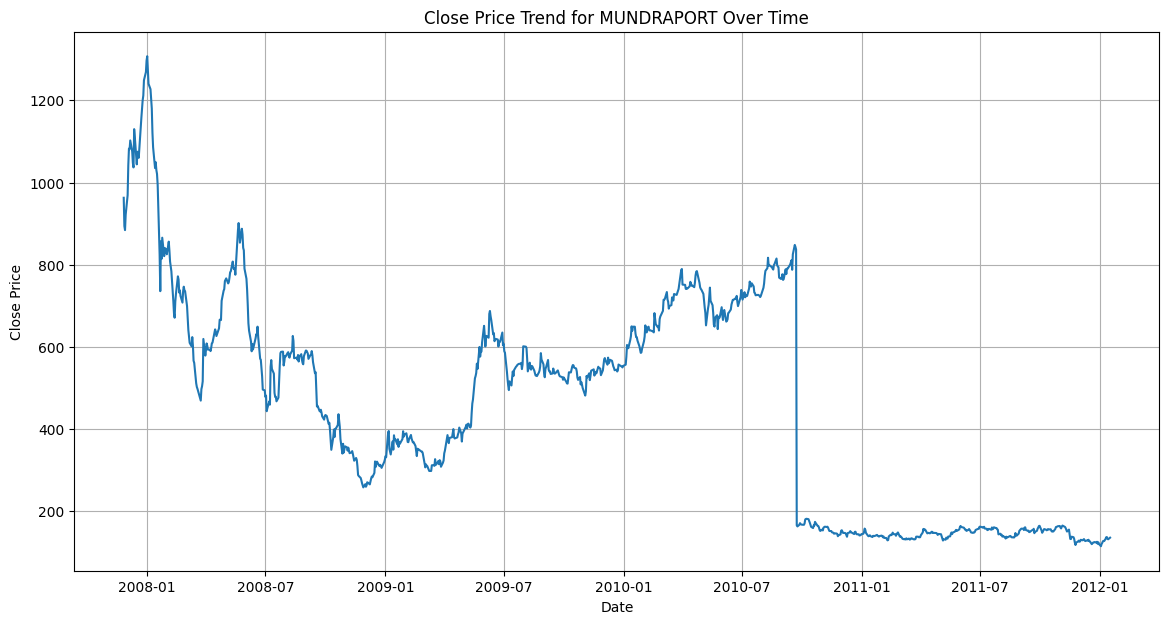

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select data for a specific symbol (e.g., MUNDRAPORT)
mundraclosedf = df[df['Symbol'] == 'MUNDRAPORT'].sort_values('Date')

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=mundraclosedf)
plt.title('Close Price Trend for MUNDRAPORT Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#### 2. Distribution of Close Prices

Understanding the distribution of `Close` prices across the entire dataset can reveal insights into the overall price ranges and common price points.

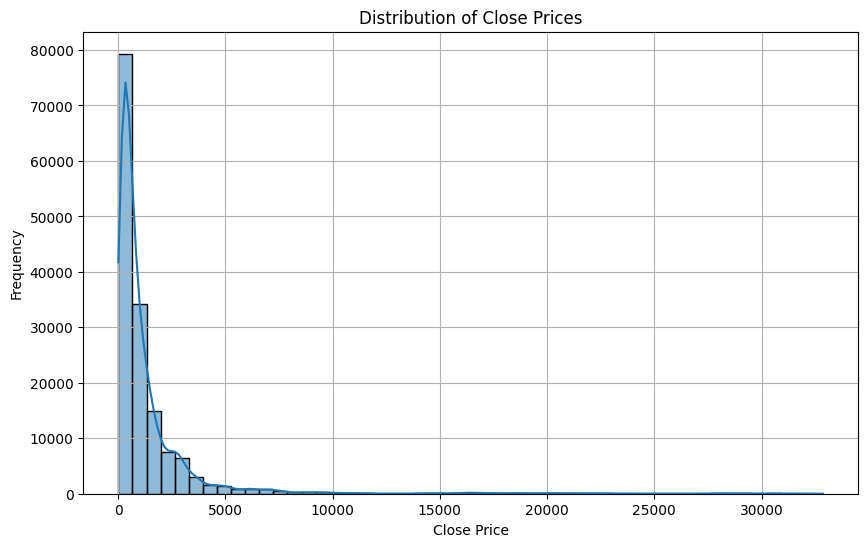

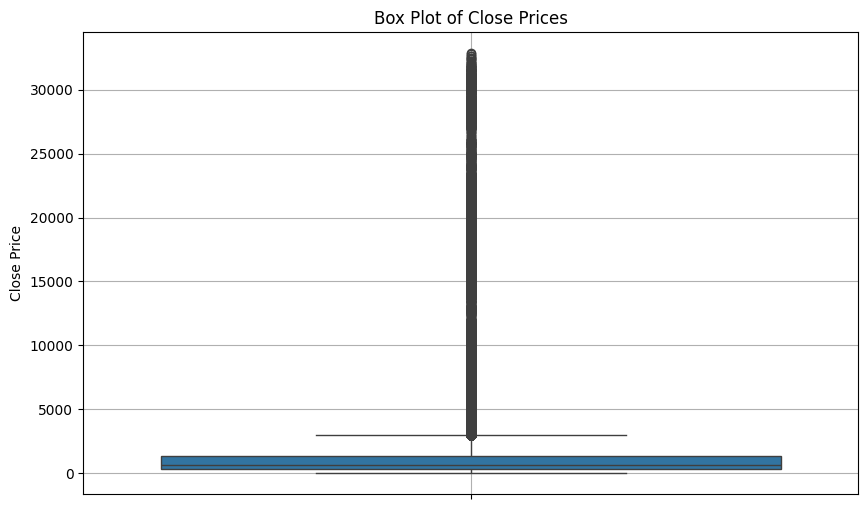

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Close'])
plt.title('Box Plot of Close Prices')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#### 3. Candlestick Chart for a Specific Stock

Candlestick charts are fundamental in financial analysis, displaying the `Open`, `High`, `Low`, and `Close` prices for each trading period, offering a clear visual representation of price movements and patterns. We'll need a specialized library like `mplfinance` for this. If it's not installed, you'll need to run `!pip install mplfinance` first.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


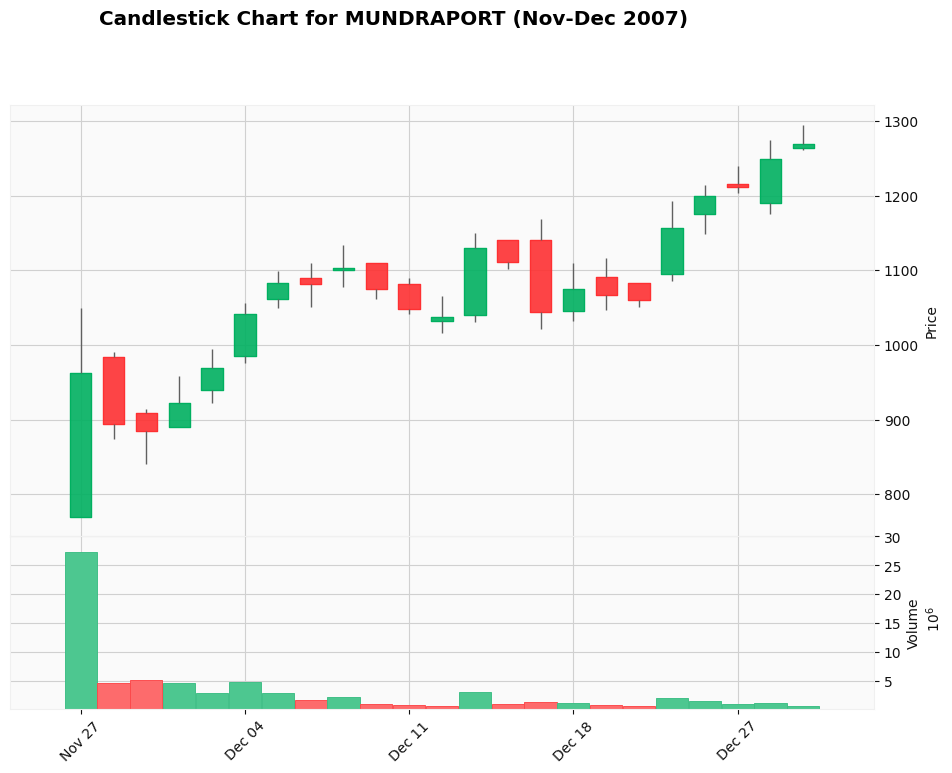

In [18]:
# Uncomment and run this line if mplfinance is not installed
!pip install mplfinance

import mplfinance as mpf

# Select data for a specific symbol and date range for the candlestick chart
# For better visualization, let's pick 'MUNDRAPORT' for a shorter period, e.g., 2007-11-27 to 2007-12-31
chart_data = df[(df['Symbol'] == 'MUNDRAPORT') & \
                (df['Date'] >= '2007-11-27') & \
                (df['Date'] <= '2007-12-31')].set_index('Date')

# Rename columns to match mplfinance's expected names
chart_data = chart_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot the candlestick chart
if not chart_data.empty:
    mpf.plot(chart_data, type='candle', style='yahoo', \
             title='Candlestick Chart for MUNDRAPORT (Nov-Dec 2007)', \
             ylabel='Price', ylabel_lower='Volume', \
             volume=True, figscale=1.5)
else:
    print("No data available for the selected symbol and date range to generate a candlestick chart.")